***
# **M1MAO -- M1 MF FES 2021/2022 -- Université Paris-Saclay**
***


In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# TP 5 : La méthode des éléments finis pour les équations élliptiques 1D

Dans ce TP, on s'intéresse à la résolution approchée de problèmes aux limites pour des équation elliptiques en dimension 1, par la méthode des éléments finis.
On s'intérèsse au problème :

$$
(P)\quad\left\{\begin{aligned}
&-u''(x)+u(x)=f(x),\ x\in (0,1),\\
&u(0)=u(1)=0,
\end{aligned}
\right.
$$
où $f:[0,1]\longrightarrow\mathbb{R}$ est une fonction de classe $\mathcal{C}^2$ donnée. Dans ces conditions, on peut montrer que le problème $(P)$ admet une unique solution de classe $C^2([0,1]).$

On considère l'espace de Sobolev 
$$ 
V:=H^1_0(]0,1[) = \left\{ v \in L^2(]0,1[)\,:\, v' \in L^2(]0,1[),\ 
v(0)=v(1)=0 \right\},
$$
muni de la norme $\|v\|_V =\big(\|v\|^2_{L^2(]0,1[)}+\|v'\|^2_{L^2(]0,1[)}\big)^\frac12.$ 


La formulation variationnelle du problème $(P)$ est donnée par  
\begin{equation*}
\begin{cases}
u\in V  \,\textrm{tel que}\\
a(v,u)=L(v),\ \,\forall\ v\in V ,
\end{cases}
\end{equation*}
où, pour $u,\ v\in V,$ 
$$
a(v,u)=\int_0^1 u'(x)v'(x)\,dx+\int_0^1 u(x)v(x)\,dx
$$ 
et 
$$
L(v)=\int_0^1 f(x)v(x)\,dx.
$$


## 1. Approximation par la méthode des éléments finis.

L'idée de la méthode des éléments finis est de chercher une solution approchée de $(PV)$ dans un sous-espace vectoriel de dimension finie $n\in\mathbb{N}$, que l'on note $V_h$ où $h=1/(n+1)$. Autrement dit, on cherche $u_h\in V_h$ tel que
$$
(P_h V)\ \ \ \ \ \ \ \ \ a(v_h,u_h)=L(v_h),\ \,\forall\ v_h\in V_h. 
$$

**Q1)** Soit $(\varphi_1,\dots,\varphi_n)$ une base de $V_h.$ Montrer que $u_h=\displaystyle{\sum_{i=1}^n u_i\varphi_i}$ est solution de $(P_h V)$ si et seulement si le vecteur $U=(u_1,\dots,u_n)^T$ est solution d'un système linéaire 
$$
KU+MU=F,
$$
où $K$ et $M$ sont des matrices de $\mathcal{M}_n(\mathbb{R})$ et $F$ un vecteur de $\mathbb{R}^n$ que l'on explicitera.

**Q2)** Soit $A=K+M.$ Montrer que le problème $(P_h V)$ admet une unique solution, en montrant que la matrice $A$ est inversible.

**$\ $**

**Choix de l'espace $V^n$ - éléments finis P1**

On discrétise l'intervalle $]0,1[$ en $n+1$ sous-intervalles $]x_i,x_{i+1}[,\ i=0,\dots,n,$ où $x_i=ih,$ avec $h=\frac{1}{n+1}$ le pas de la discrétisation.
Le principe de la méthode des éléments finis P1 consiste à considérer $V_h$ le sous-espace de $V$ des fonctions affines par morceaux, polynômes de degré 1 dans les intervalles $[x_i,x_{i+1}],$ c'est-à-dire  
$$ 
V_h \ := \left \{ v_h \in C^0([0,1])\,\,:\,\ v_h\ \textrm{est affine sur } {[x_i,x_{i+1}]}  \textrm{ et } v_h(0)=v_h(1)=0 \right \} .
$$

On considère une base $\,\varphi_{i}$, $i=1,...,n,\ $ où 
$$
\varphi_{i}(x)= 
\begin{cases}
\dfrac{x-x_{i-1}}{x_{i}-x_{i-1}},  &  \textrm{si } x_{i-1} \le  x \le  x_{i},  \\
\dfrac{x-x_{i+1}}{x_{i}-x_{i+1}},  &  \textrm{si } x_{i} \le  x \le x_{i+1},  \\
0,  &  \textrm{sinon.}  
\end{cases}
$$

Les fonctions $\varphi_i$ sont communément appelées *fonctions chapeau.*

**Q3)** Calculer explicitement en fonction de $h$ les coefficients des matrices $K$ et $M.$ Donner l'expression des coefficients $F_i$ du vecteur $F$ et calculer une valeur approchée de $F_i$ par la méthode des trapèzes. 

**Q4)** Écrire deux `K(n)` et `M(n)` calculant les matrices $K$ et $M.$ 


In [2]:
def K(n):
    return -(np.diag(np.ones(n-1),1)-2*np.eye(n)+np.diag(np.ones(n-1),-1))*(n+1)
def M(n):
    return ((1/6)*np.diag(np.ones(n-1),1)+(2/3)*np.eye(n)+(1/6)*np.diag(np.ones(n-1),-1))*(1/(n+1))


**Q5)** Écrire une fonction `F(f,n)` prennant en argument une fonction $f$ et le nombre de points de la discretisation.  La fonction retournera le vecteur $F$ en utilisant la méthode des trapèzes pour calculer $F_i$. 

In [3]:
def F(f,n):
    h=1./(n+1)
    x=np.linspace(0+h,1-h,n)
    return f(x)*h


**Q6)** Ecrire un programme donnant la solution approchée $u_h$ de $(P_v)$ dans le cas $f=1$ et $f=(1+\pi^2)\sin(\pi x).$ 

Représenter, dans les deux cas, la solution approchée obtenue en prennant $n=500$ et la solution exacte. Pour cela, remarquer que





*i)* La solution de $(P)$ pour $f=1$ est donnée par
$$
u(x)=1-\dfrac{e^x+e^{1-x}}{1+e} ;
$$

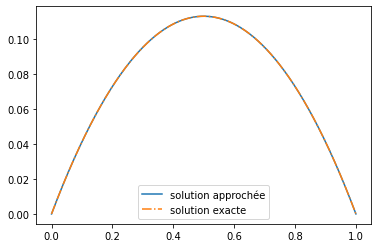

In [4]:



n=500
h=1/(n+1)
x=np.linspace(0,1,n+2)
f1=lambda x: np.ones(len(x))
uexact1 =lambda x: 1-(np.exp(x)+np.exp(1-x))/(1+np.exp(1))
A=K(n)+M(n)
b=F(f1,n)
u=np.zeros(n+2)
u[1:-1]=np.linalg.solve(A,b)
plt.figure()
plt.plot(x,u,label="solution approchée")
plt.plot(x,uexact1(x),'-.',label="solution exacte")
plt.legend()






*ii)* La solution de $(P)$ pour $f=(1+\pi^2)\sin(\pi x)$ est donnée par $u(x)=\sin(\pi x).$


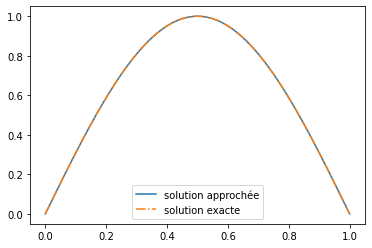

In [5]:
f2=lambda x: (1+np.pi**2)*np.sin(np.pi*x)
uexact2 =lambda x: np.sin(np.pi*x)
A=K(n)+M(n)
b=F(f2,n)
u=np.zeros(n+2)
u[1:-1]=np.linalg.solve(A,b)
plt.figure()
plt.plot(x,u,label="solution approchée")
plt.plot(x,uexact2(x),'-.',label="solution exacte")
plt.legend()


**Q7)** Soit $r_h u=\displaystyle{\sum_{i=1}^n u(x_i)\varphi_i}$ l'interpolé $P1$ de la solution exacte $u$ de $(P)$ aux points $x_i.$ Calculer, pour différentes valeurs de $n=10,100,200,300,400$ la norme $H^1$ de l'erreur $u_h-r_h u$ dans le cas $f=1$. Remarquer que cette intégrale peut se calculer en utilisant la matrice $K+M.$ Afficher l'erreur en fonction de $h$ en echelle logaritmique et evaluer l'ordre de précision de la méthode en norme $H^1.$ 


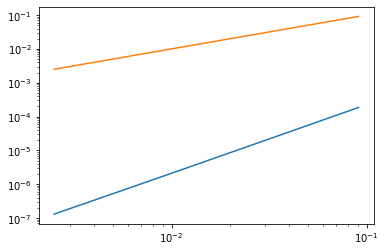

In [6]:
n=[10, 100, 200,300, 400]
err=[]
dh=[]
for i in n:
    x=np.linspace(0,1,i+2)
    A=K(i)+M(i)
    b=F(f1,i)
    u=np.zeros(i+2)
    u[1:-1]=np.linalg.solve(A,b)
    error=u-uexact1(x)
    err.append(np.sqrt(np.dot(np.dot(error,K(i+2)+M(i+2)),error)))
    dh.append(1./(i+1))
    
    
plt.figure()
plt.plot(dh,err)
plt.plot(dh,dh)
plt.xscale('log')
plt.yscale('log')


## 2. Conditions aux limites de Neumann.

Soit maintenant $a>0$ et considérons le problème 

$$
(\tilde{P})\quad\left\{\begin{aligned}
&-u''(x)+au(x)=f(x),\ x\in (0,1),\\
&u'(0)=a,\ u'(1)=b.
\end{aligned}
\right.
$$

**Q1)** Ecrire la formulation variationnelle de $\tilde{P}$ dans l'espace $H^1$ et justifier l'existence d'une unique solution $u\in H^1(0,1)$.

Pour approcher le problème $\tilde{P}$ on considère, avec les mêmes notations qu'avant, l'espace 
$$ 
\tilde V_h \ := \left \{ v_h \in C^0([0,1])\,\,:\,\ v_h\ \textrm{est affine sur } {[x_i,x_{i+1}]} \right \} .
$$

L'espace $\tilde{V}_h$ est un espace de dimension finie $n+2$ dont une base est constituée des fonctions $\varphi_i,$  $i=0,\dots,n+1,$ avec  
- $\varphi_{0}$ la fonction continue, affine sur $[x_0,x_{1}],$ telle que $\varphi_{0}(x_0)=1,\ \varphi_{0}(x_i)=0,\ $ pour $i=1,\dots,n+1$,
- $\varphi_{n+1}$ la fonction continue, affine sur $[x_n,x_{n+1}],$ telle que $\varphi_{n+1}(x_{n+1})=1,\ \varphi_{n+1}(x_i)=0,\ $ pour $i=0,\dots,n.$

**Q2)** Écrire le problème variationnel discret associé à la formulation variationnelle trouvée et en deduire la fomulation matricielle 

$$ (K+aM)U=b, $$
où le vecteur $n\in\mathbb R^{n+2}$ est à detrminer.

**Q3)** Écrire deux fonctions `Kneu(n)` et `Mneu(n)` calculant les matrices $K$ et $M$ et une fonction `b(f,n,alpha,beta)` prennant en argument une fonction $f$, le nombre de points de la discretisation et les conditon au bord $\alpha,\beta$.




In [7]:
def Kneu(n):
    
    K= -(np.diag(np.ones(n-1),1)-2*np.eye(n)+np.diag(np.ones(n-1),-1))
    K[0,0]=1.
    K[n-1,n-1]=1.
    return K
def Mneu(n):
    M= ((1/6)*np.diag(np.ones(n-1),1)+(2/3)*np.eye(n)+(1/6)*np.diag(np.ones(n-1),-1))
    M[0,0] *= 0.5
    M[n-1,n-1] *= 0.5
    return M

def b(f,n,alpha,beta):
    h=1./(n+1)
    x=np.linspace(0,1,n+2)
    F=f(x)*h
    F[0] = .5*F[0]-alpha
    F[n+1] = .5*F[n+1]+beta
    return F


**Q4)** Ecrire un programme donnant la solution approchée de $\tilde{P}$ dans le cas $a=1,\alpha=\beta=0, n=500$ $f=\cos(\pi x),$ pour lequel la solution exacte de $\tilde{P}$ est donnée par $u(x)=\dfrac{\cos(\pi x)}{1+\pi^2}$.

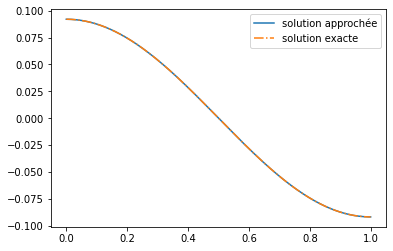

In [8]:
n=500
h=1./(n+1)
fn=lambda x: np.cos(np.pi*x)
uexact_n =lambda x: np.cos(np.pi*x)/(1+np.pi**2)
x=np.linspace(0,1,n+2)
A=(Kneu(n+2)/h+h*Mneu(n+2))
B=b(fn,n,.0,.0)
u=np.linalg.solve(A,B)
plt.figure()
plt.plot(x,u,label="solution approchée")
plt.plot(x,uexact_n(x),'-.',label="solution exacte")
plt.legend()
